# [Project 3] 반도체 공정 데이터를 활용한 공정 이상 예측

---

## 프로젝트 목표
- 반도체 공정 데이터 분석을 통하여 공정 이상을 예측하는 분류 모델 수행
- 공정 이상에 영향을 미치는 요소들에 대한 데이터 분석

---

## 프로젝트 목차

1. **데이터 읽기:** 반도체 공정(SECOM) 데이터를 불러오고 Dataframe 구조를 확인<br>


2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 대체<br>


3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악<br>
    3.1. Pass/Fail 시각화<br>
    3.2. 센서 데이터 시각화 하기<br>
    3.3. 59번 센서 데이터 시각화 하기<br>


4. **데이터 전 처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리<br>
    4.1. x와 y로 분리<br>
    4.2. 데이터 정규화<br>


5. **머신러닝 모델 학습:** 분류 모델을 사용하여 학습 수행<br>
    5.1. 기본 분류 모델 학습 - 로지스틱 분류기<br>
    5.2. 다양한 분류 모델 학습<br>


6. **평가 및 예측:** 학습된 모델을 바탕으로 평가 및 예측 수행<br>
    6.1. Confusion Matrix<br>
    6.2. Precision & Recall<br>
    6.3. 테스트 데이터의 예측값 출력<br>



---

## 데이터 출처
- https://archive.ics.uci.edu/ml/datasets/SECOM

---

## 프로젝트 개요

제조 분야의 디지털 트랜스포메이션이 진행되면서 제조 공정에서 일어나는 수많은 정보가 데이터로 정리되고 있습니다. 제조 공정의 이상을 탐지 분야는 이러한 데이터 바탕으로 구현되는 인공지능 기술로 기존 확률 기반의 예측보다 높은 효율을 내고 있습니다. 이러한 이상 탐지 알고리즘은 불량률을 예측하는 것 뿐만 아니라 어떠한 요소가 불량품을 나오게 하는지 그 원인을 파악하는데 또한 도움을 줄 수 있습니다. 따라서 제조 분야에서의 인공지능을 활용한 이상 탐지는 계속 연구되고 있으며 빠르게 적용되며 그 효율을 보여주고 있습니다.

이번 실습에서는 UCI에서 제공하는 SECOM 공정에서 측정된 센서 데이터를 기반으로 한 데이터를 바탕으로 공정 이상을 예측해보는 분류 모델을 구현합니다. 이를 활용하여 센서 데이터가 주어 졌을 때 공정 이상이 생기는지를 예측할 수 있으며, 공정 이상 시 어떠한 센서들이 중요한 역할을 하는지 알아봅니다.

---

## 1. 데이터 읽기

pandas를 사용하여 `uci-secom.csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# german_credit_data.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
data = pd.read_csv('data/uci-secom.csv')

In [3]:
# 5개의 행을 확인합니다. head()를 사용합니다. head() 안에 숫자를 넣을 수 있습니다. 
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# dataframe의 정보를 요약해서 출력합니다.
# info()로 정보를 알 수 있습니다.
# shape로 몇 행과 몇 열로 되어있는지 알 수 있습니다. 처음이 행이고 두번째 열입니다.
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


(1567, 592)

In [5]:
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
# mean은 평균, std는 표준편차를 나타냅니다. 
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


## 2. 데이터 정제

일반적으로 데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)**를 처리합니다.

**결측값**은 값이 없는 것을 말합니다. NaN, Null이 결측값입니다. 

**이상치**는 일반적인 범주에서 벗어난 값을 말합니다. 평균 연령을 구할 때 200살과 같이 일반적인 범주에 있지 않는 값을 이상치라고 합니다. 

머신러닝 모델을 만들 때는 데이터가 중요합니다. 결측값과 이상치는 모델의 성능에 안 좋은 영향을 줄 수 있으므로 처리해서 사용합니다.

이번 데이터에서는 수많은 변수(feature)가 존재하기에 각 데이터를 보며 이상치를 처리하기엔 한계가 있습니다.

따라서 본 과정에서는 간단하게 결측값에 대해서만 처리를 수행하겠습니다.

아래 코드를 수행하여 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [6]:
# 결측값 정보를 출력합니다.
# isnull()은 결측값이 있는지 True, False로 반환합니다. 
# data.isnull().sum()로 각 컬럼에서 결측값의 수를 구합니다.
# data.isnull().sum().sum()로 전체 결측값의 수를 구할 수 있습니다.
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

모든 데이터를 사용하기 위해서는 결측값을 0으로 대체합니다.

결측값이 많지 않다면 fillna(값, inplace=True)를 사용하여 삭제하는 방법도 있습니다.

DataFrame.fillna(0, inplace=True)을 하면 결측값을 0으로 바꿉니다. 

In [8]:
# 결측값을 0으로 대체합니다.
# np.NaN이 결측값입니다. 이것을 replace을 사용해서 0으로 바꿉니다.
data = data.replace(np.nan, 0)

# 결측값 정보를 출력합니다.
data.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [9]:
# 'Time'변수의 데이터는 pass/fail을 예측하는데 큰 영향이 없다 생각하여 삭제합니다.
# axis=0은 행방향으로 동작합니다. 
# axis=1은 열 방향으로 동작합니다. 
# drop() 안에 삭제할 컬럼 이름을 적고 axis =1 로 정합니다.
data = data.drop(columns = ['Time'], axis = 1)

data.shape

(1567, 591)

In [10]:
# data에서 잘 삭제되었는지 확인합니다.
data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


## 3. 데이터 시각화

머신러닝을 할 때 숫자만으로는 데이터가 어떤 의미를 갖는지 이해하기 어렵습니다. 

그래서 데이터를 시각화해서 파악하는 것이 중요합니다. 

각 변수 분포를 알아보기 위하여 시각화를 수행하겠습니다.

센서에 관련된 590개의 변수들은 시각화하기에 너무 양이 많기에 영향력이 크다고 판단되는 `59` 센서에 대해서만 시각화를 진행해 보겠습니다. `59`번 데이터는 머신러닝 모델을 사용했을 때, 높은 중요도로 뽑힌 변수이기에 대표로 출력하였습니다. 

### 3.1. `Pass/Fail` 시각화

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

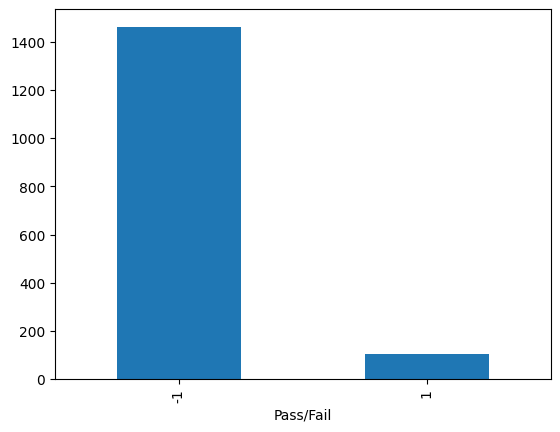

In [11]:
# 분포를 막대 그래프를 사용하여 출력합니다.
# pandas 모듈을 plot()를 사용해서 막대그래프를 그릴 수 있습니다.
# value_counts()로 합계를 구합니다.  
data['Pass/Fail'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
data['Pass/Fail'].value_counts()

### 3.2. 센서 데이터 시각화 하기

다수의 feature 데이터에 대해서 한눈에 볼 수 있도록 시각화를 수행할 때는 seaborn의 `pairplot`를 활용하여 해결할 수 있습니다. 

590개 센서에 대한 출력을 `pairplot`으로 수행하기엔 출력 결과도 보기 힘들뿐더러 출력 시간도 매우 오래 걸립니다.

따라서 아래 코드와 같이 3,4,5, Pass/Fail 데이터에 대해서만 출력해보겠습니다.

In [12]:
#3,4,5,Pass/Fail 컬럼으로 새로운 DataFrame을 만듭니다. 리스트 안에 컬럼 이름을 적습니다. 
data_test= data[['3','4','5','Pass/Fail']]
data_test

,3,4,5,Pass/Fail
0,1411.1265,1.3602,100.0,-1
1,1463.6606,0.8294,100.0,-1
2,1698.0172,1.5102,100.0,1
3,909.7926,1.3204,100.0,-1
4,1326.5200,1.5334,100.0,-1
...,...,...,...,...
1562,3085.3781,1.4843,100.0,-1
1563,1124.6595,0.8763,100.0,-1
1564,1110.4967,0.8236,100.0,-1
1565,1183.7287,1.5726,100.0,-1


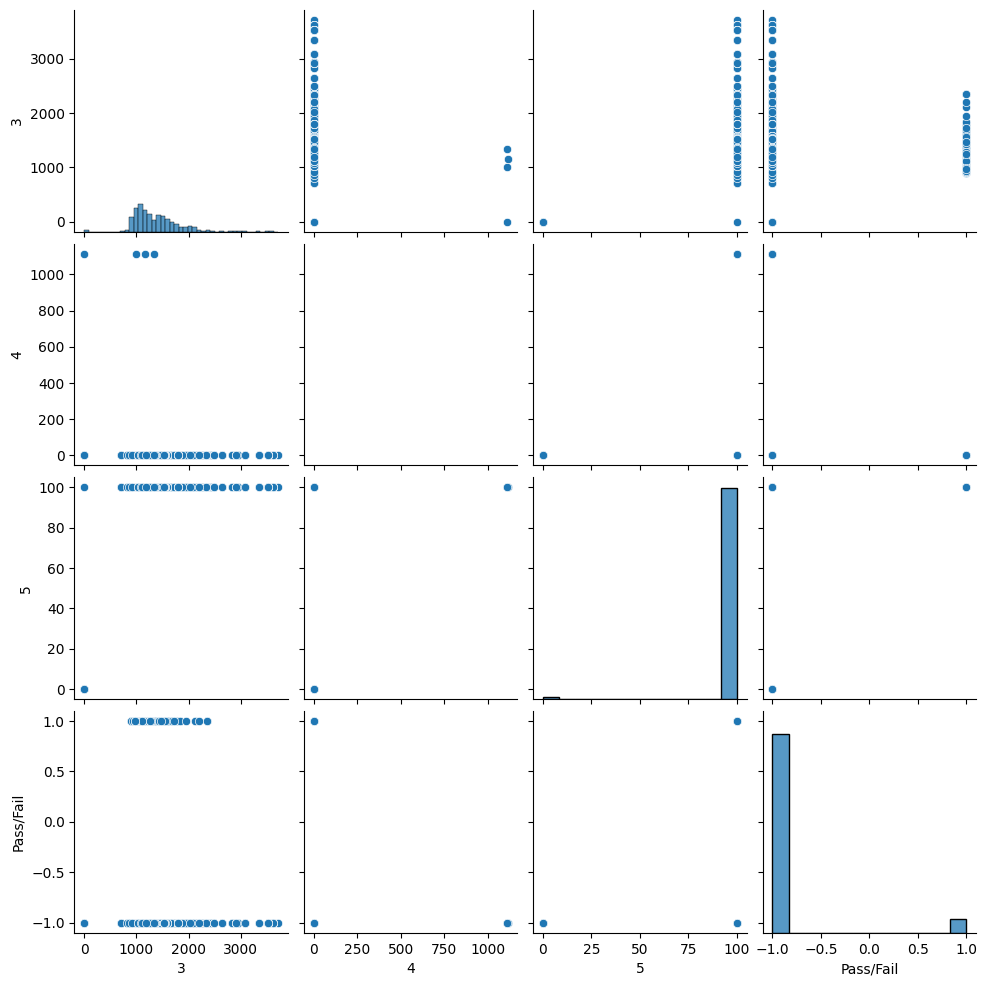

In [13]:
#seaborn의 pairplot()을 사용해서 컬럼끼리 비교할 수 있습니다. 
sns.pairplot(data_test)

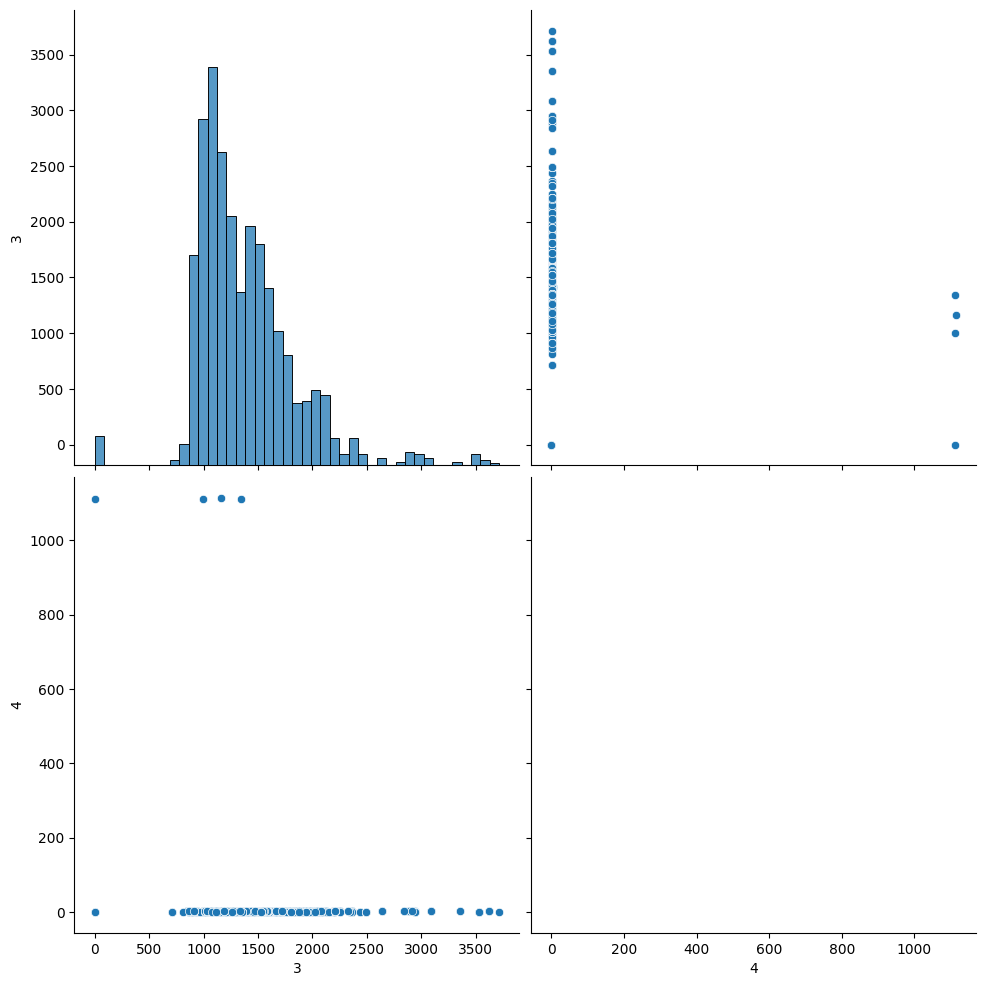

In [14]:
# vars를 사용해서 특정한 컬럼끼리 비교할 수도 있습니다. 
sns.pairplot(data_test,height=5, vars=['3','4'])

### 3.3. `59`번 센서 시각화

/var/folders/3_/_16tlvps5z768_sdb6hpw9q80000gn/T/ipykernel_54509/2012713023.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['59'], color = 'darkblue')


Text(0.5, 1.0, '59 Sensor Measurements')

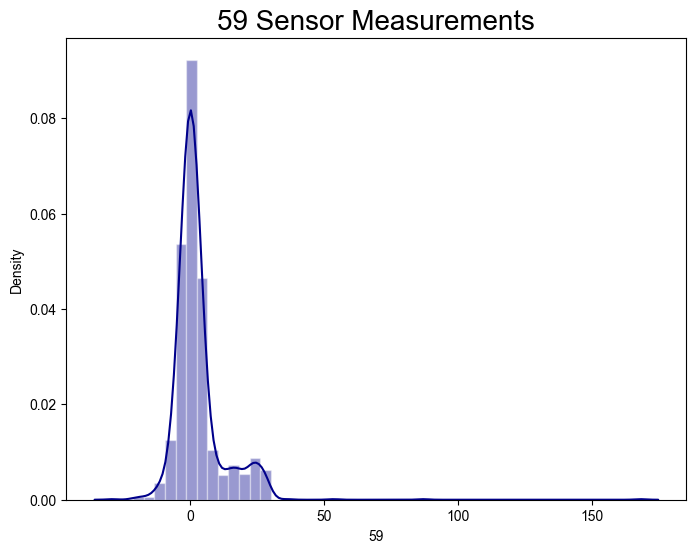

In [15]:
# 그래프의 사이즈를 설정합니다.
# subplots는 한 번에 여러 그래프를 보여주기 위해서 사용합니다. 
# subplots()에선 두개의 값을 받을 수 있는데 figure와 axes 값을 받을 수 있습니다. 여기서 변수명은 상관없습니다. 순서가 중요합니다.
# fig란 figure로써  전체 subplot을 말합니다. 몇개의 그래프가 있던지 상관없이 그것을 담는 그릇이라고 생각하면 됩니다. 전체 사이즈를 말합니다.
# ax는 axe로써 각각의 그래프를 말합니다. 
# figsize(가로, 세로)로 크기를 정합니다. 
fig, ax = plt.subplots(figsize=(8, 6))

# seborn 그래프의 스타일을 설정합니다.
# style에 white, whitegrid, dark 등을 넣어서 스타일을 바꿀 수 있습니다.
sns.set(style='darkgrid')

# 59번 데이터의 분포를 출력합니다.
# displot로 분포도를 그립니다. 
# yellow, green와 같은 색깔을 넣습니다. 
sns.distplot(data['59'], color = 'darkblue')

# 그래프의 제목을 설정합니다. 
plt.title('59 Sensor Measurements', fontsize = 20)

/var/folders/3_/_16tlvps5z768_sdb6hpw9q80000gn/T/ipykernel_54509/1134700755.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['59'], color = 'darkblue')
/var/folders/3_/_16tlvps5z768_sdb6hpw9q80000gn/T/ipykernel_54509/1134700755.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[da

Text(0.5, 1.0, '59 Sensor Measurements')

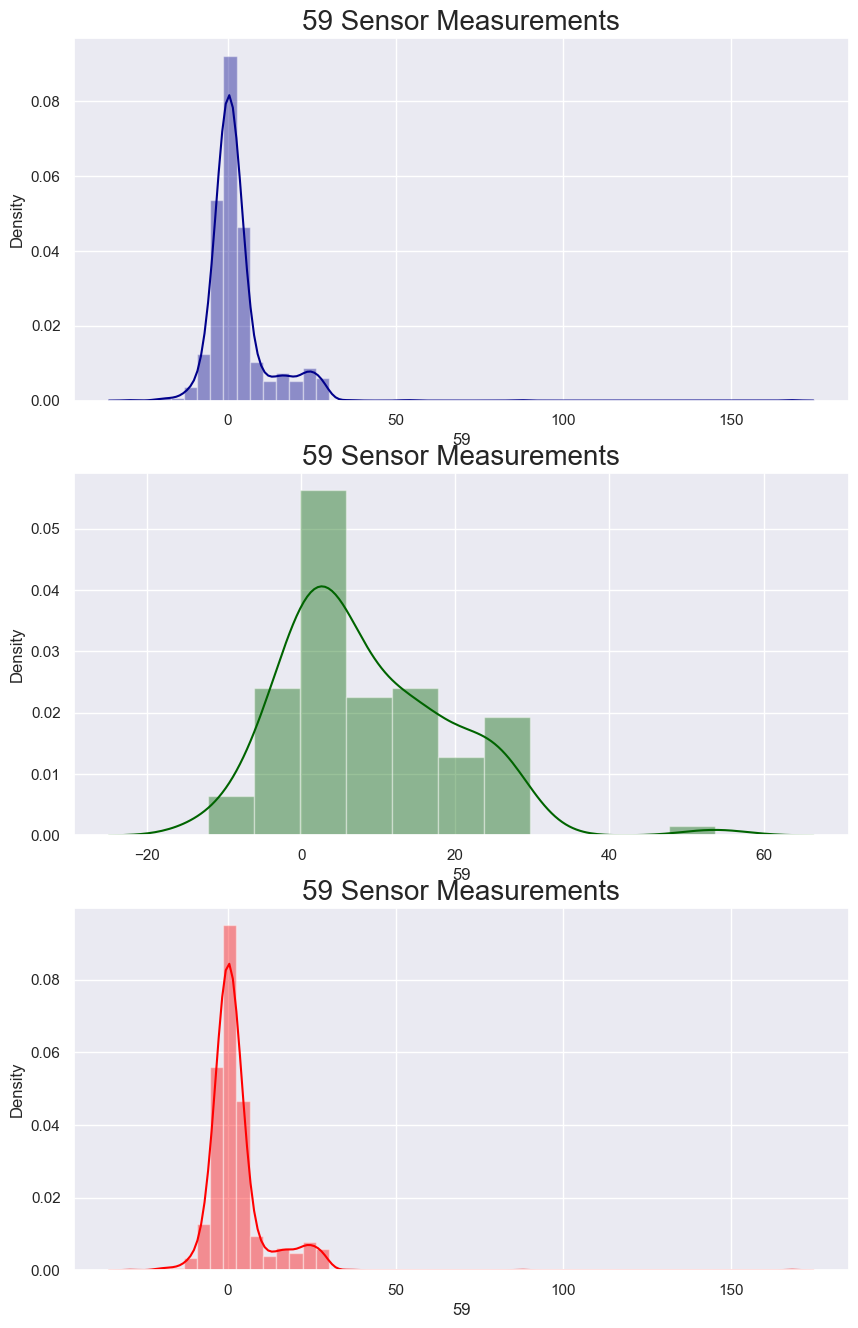

In [16]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다. 
plt.rcParams['figure.figsize'] = (10, 16)

# 3x1 형태로 그래프를 출력하기 위하여 subplot을 설정합니다. 
# subplot(행, 열, 인덱스)로 그래프의 위치를 정합니다. 
plt.subplot(3, 1, 1)
sns.distplot(data['59'], color = 'darkblue')
plt.title('59 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 1인 데이터를 출력합니다.
#  data[data['Pass/Fail']==1]를 하면 'Pass/Fail' 값이 1인 행만 사용할 수 있습니다.
plt.subplot(3, 1, 2)
sns.distplot(data[data['Pass/Fail']==1]['59'], color = 'darkgreen')
plt.title('59 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 -1인 데이터를 출력합니다.
plt.subplot(3, 1, 3)
sns.distplot(data[data['Pass/Fail']==-1]['59'], color = 'red')
plt.title('59 Sensor Measurements', fontsize = 20)

/var/folders/3_/_16tlvps5z768_sdb6hpw9q80000gn/T/ipykernel_54509/3273385790.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['59'], color = 'darkblue')
/var/folders/3_/_16tlvps5z768_sdb6hpw9q80000gn/T/ipykernel_54509/3273385790.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[dat

Text(0.5, 1.0, '59 Sensor Measurements')

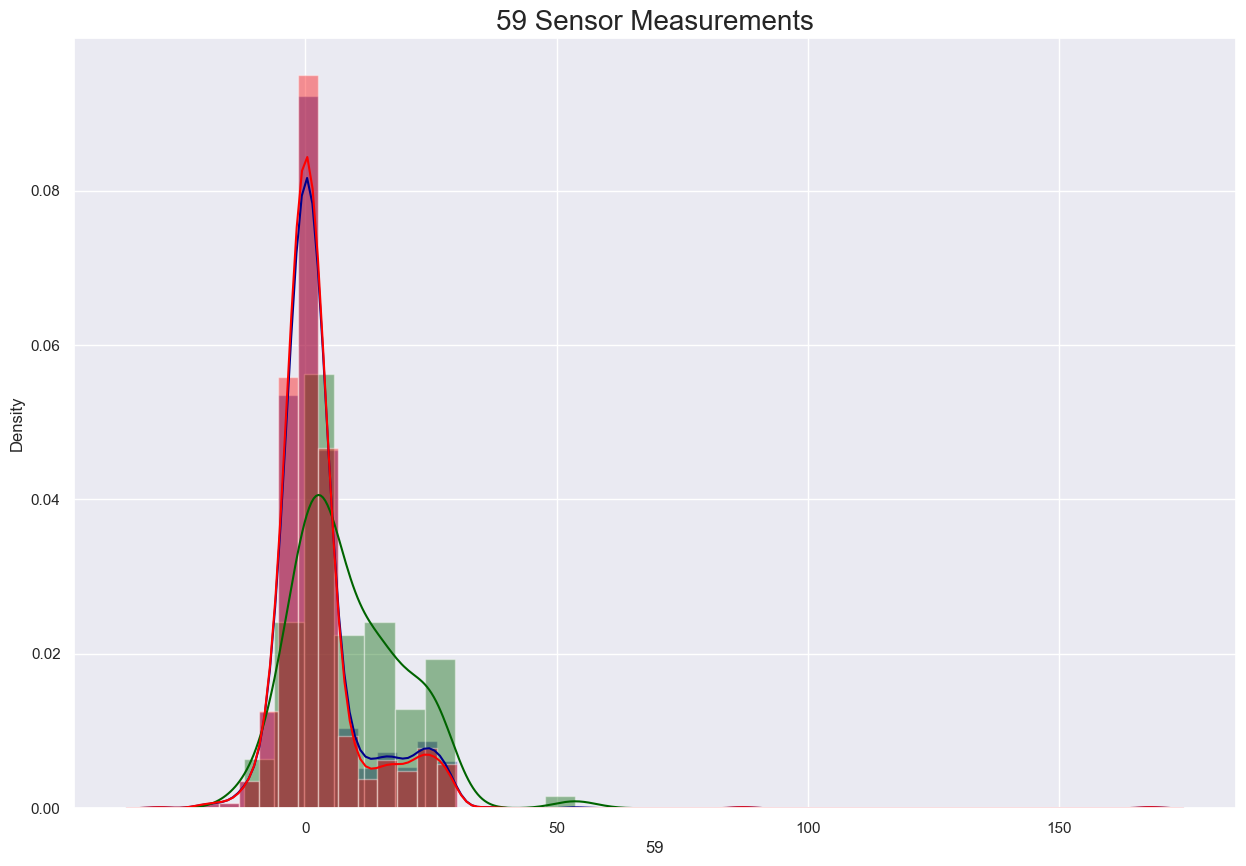

In [17]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다.
plt.rcParams['figure.figsize'] = (15, 10)

# 위 나누어 출력 했던 그래프를 한번에 출력합니다.
sns.distplot(data['59'], color = 'darkblue')
sns.distplot(data[data['Pass/Fail']==1]['59'], color = 'darkgreen')
sns.distplot(data[data['Pass/Fail']==-1]['59'], color = 'red')

# 제목과 폰트크기를 정합니다.
plt.title('59 Sensor Measurements', fontsize = 20)

## 4. 데이터 전 처리

공정 이상 예측을 수행하기 위해서 주어진 센서 데이터에 대해서 분류 모델을 사용할 것입니다.

분류 모델의 필요한 입력 데이터를 준비 하기위해서 다음과 같은 전 처리를 수행하겠습니다.

1. 전체 데이터를 feature 데이터인 `x`와 label 데이터인 `y`로 분리하기
2. StandardScaler를 통한 데이터 표준화하기

### 4.1.  `x`와  `y`로 분리

머신러닝의 feature 데이터는 `x`, label 데이터는 `y`에 저장합니다.

In [18]:
# 예측해야 할 변수인 `Pass/Fail`를 제거하여 머신러닝 입력값인 x에 저장합니다.
# data에는 'Pass/Fail'의 없어집니다. 
x = data.drop(columns = ['Pass/Fail'], axis = 1)

# 예측해야 할 변수 `Pass/Fail`만을 선택하여 numpy 형태로 y에 저장합니다.
y = data['Pass/Fail']

# ravel은 "풀다"로 다차원을 1차원으로 푸는 것을 의미합니다.
# 1차원 벡터 형태로 출력하기 위해 ravel 사용합니다. 
y = y.to_numpy().ravel() 
y

array([-1, -1,  1, ..., -1, -1, -1])

In [19]:
# 타입을 확인합니다. 
type(y)

numpy.ndarray

원본 데이터의 수가 많지 않기에 원본 데이터에서 샘플 데이터를 추출하고 노이즈를 추가하여 테스트 데이터를 생성하였습니다.

`data` 폴더 내의 `uci-secom-test.csv`에 590개의 센서 데이터와 `Pass/Fail`저장되어 있기에 해당 데이터를 읽어와 `x_test, y_test` 데이터로 분리합니다.

In [20]:
# data 폴더 내의 uci-secom-test.csv를 DataFrame으로 읽고 x_test, y_test로 분리합니다. 
data_test = pd.read_csv("data/uci-secom-test.csv")
x_test = data_test.drop(columns = ['Pass/Fail'], axis = 1)
y_test = data_test['Pass/Fail'].to_numpy().ravel() 

In [21]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3058.576438,2456.188003,2174.584701,1113.987638,1.017292,100.0,103.784665,0.124100,1.373089,0.008796,...,0.004038,53.973861,0.502555,0.012549,0.003425,2.494222,0.021644,0.017824,0.005433,98.028276
1,3225.540000,2500.380000,2211.400000,1511.784200,1.300400,100.0,97.470000,0.123700,1.367100,-0.019700,...,0.000000,0.000000,0.498500,0.031600,0.006600,6.343200,-0.004700,0.013400,0.003500,286.130300
2,3027.019797,2495.244836,2239.283771,1878.339266,1.875838,100.0,95.120185,0.122412,1.390140,0.006793,...,0.000000,0.000000,0.501425,0.013365,0.003555,2.673789,0.031982,0.013443,0.004191,40.419061
3,3021.865769,2415.728398,2182.942505,1101.940802,1.387535,100.0,103.816952,0.123432,1.513284,-0.027191,...,0.000287,3.060171,0.496957,0.013008,0.003423,2.617648,0.034111,0.024022,0.009235,70.072016
4,2998.755593,2411.935120,2208.165877,1172.869419,1.364676,100.0,101.940758,0.120709,1.449954,-0.002415,...,0.000000,0.000000,0.502647,0.012165,0.003780,2.415892,0.021732,0.012311,0.004373,56.939737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3195.313583,2574.575891,2182.627068,1298.120763,1.136111,100.0,100.595296,0.123883,1.453430,-0.006297,...,0.000000,0.000000,0.504501,0.010725,0.002897,2.130713,0.023792,0.018378,0.004805,78.594099
596,3188.528676,2487.406049,2229.243491,1919.534712,1.721749,100.0,90.751196,0.121213,1.508781,-0.000400,...,0.003323,39.058868,0.503270,0.014522,0.003933,2.885034,0.027042,0.016736,0.005161,61.086557
597,2984.033064,2443.702629,2158.885138,1136.388716,0.969641,100.0,100.382653,0.123852,1.457508,0.011576,...,0.003021,59.349219,0.506682,0.023895,0.005502,4.713328,0.026378,0.014914,0.004260,66.961602
598,3063.078522,2467.486566,2202.678342,1584.689479,1.277982,100.0,99.019675,0.121936,1.480350,-0.016639,...,0.003647,36.450388,0.497065,0.012103,0.002981,2.427864,0.029651,0.011548,0.003842,38.986213


### 4.2. 데이터 표준화

각 변수 마다의 스케일 차이를 맞추기 위하여 표준화를 수행합니다. 

표준화는 서로 다른 피처의 크기를 통일하기 위해서 크기를 변환해주는 개념입니다.

데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 형태와 가까워지도록 변환합니다.

In [22]:
from sklearn.preprocessing import StandardScaler

# 정규화를 위해서 StandardScaler 불러옵니다.
sc = StandardScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행합니다. 
x_train = sc.fit_transform(x)
x_test = sc.transform(x_test)
y_train = y

In [23]:
#mean()으로 평균을 구하고 var()로 분산을 구합니다. 
#e는 소수부의 크기를 알려주는 자리입니다. 여기서는 엄청 작은 값으로 0으로 생각하면 됩니다. 
x_train_sc = pd.DataFrame(data=x_train)
print("평균")
print(x_train_sc.mean())
print("분산")
print(x_train_sc.var())

평균
0      4.987856e-17
1     -1.002672e-15
2      1.178948e-15
3     -2.176519e-16
4      1.813766e-17
           ...     
585   -4.874495e-17
586    9.975712e-17
587    9.975712e-17
588    2.720649e-16
589    5.894739e-17
Length: 590, dtype: float64
분산
0      1.000639
1      1.000639
2      1.000639
3      1.000639
4      1.000639
         ...   
585    1.000639
586    1.000639
587    1.000639
588    1.000639
589    1.000639
Length: 590, dtype: float64


In [24]:
x_train_sc

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.094946,-0.228536,0.239971,0.436850,1.128343,...,-0.648235,-0.530195,0.055275,-0.204269,-0.092516,-0.196519,-1.734706,-1.868461,-1.840769,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.094946,0.187826,0.278951,0.393723,0.022511,...,1.179427,2.327864,0.162312,0.407145,0.445214,0.385516,-0.958144,0.412587,0.251029,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.094946,-0.415634,0.232175,-0.192349,0.327111,...,3.859997,0.607241,-0.304064,0.022827,0.015030,0.030373,2.989383,3.624211,3.318999,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.094946,0.354494,0.045074,0.300837,-0.765478,...,0.692050,0.483463,-0.059408,-0.291614,-0.361381,-0.282803,-0.100689,-0.177535,-0.306784,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.094946,0.016475,0.185400,0.465600,-0.149655,...,-0.648235,-0.530195,-1.512057,26.860983,27.062850,26.907579,-0.100689,-0.177535,-0.306784,-0.274469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-0.517139,-0.110096,-0.005517,3.708612,-0.047698,0.094946,-1.581192,0.286746,-1.311414,-0.242360,...,0.783434,2.258782,-0.074699,-0.058694,0.015030,-0.055631,-1.184641,-0.302368,-0.202194,1.103337
1563,0.246823,0.204859,0.084535,-0.565054,-0.058538,0.094946,-0.153221,-0.048477,-0.306246,-0.348308,...,-0.648235,-0.530195,-0.174091,-0.128570,-0.065629,-0.123601,-1.184641,-0.302368,-0.202194,1.103337
1564,-0.120418,-0.567887,0.121512,-0.595924,-0.059478,0.094946,-0.070186,-0.025089,-16.155624,0.055619,...,0.113291,0.067254,-0.082344,-0.000465,0.068803,-0.001920,-0.141135,-0.892490,-0.969186,-0.597485
1565,-0.539573,0.256061,-0.018427,-0.436304,-0.046124,0.094946,-0.124269,0.013890,0.013330,-0.421147,...,1.636342,0.753215,0.047630,0.145110,-0.011856,0.139891,0.384663,0.911921,0.773979,-0.065118


## 5. 머신러닝 모델 학습

전 처리된 데이터를 바탕으로 분류 모델을 학습을 수행하고 학습 결과를 출력 해봅니다.

먼저 기본적인 분류 모델인 **로지스틱 분류기(logistic regression classifier)**를 사용하여 학습을 수행하고, 다양한 모델들을 살펴봅시다.


### 로지스틱 회귀
로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘입니다. 

로지스틱 회귀는 회귀라는 말이 들어갔지만 분류에 사용됩니다. 

로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아닙니다.

시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 점입니다. 

확률에 따라서 분류를 결정합니다.

로지스틱 회귀는 주로 이진(0과 1) 분류에 사용됩니다. 로지스틱 회귀에서 예측 값은 예측 확률의 의미합니다.

예측 값 즉, 예측 확률이 0.5이상이면 1로, 그렇지 않으면 0으로 예측합니다.

<img src="img/1-1.png" width="30%" height="30%" title="로지" alt="로지"></img>

### 5.1. 기본 분류 모델 학습 - 로지스틱 분류기

In [25]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 분류기 모델 class를 가져 옵니다.
# max_iter는 로지스틱 알고리즘의 반복 횟수를 정하는 파라미터로 본 실습에서는 default 값으로는 모자르기에 아래와 같이 설정합니다.
model = LogisticRegression(max_iter=5000)

# 데이터를 학습시킬 때는 fit 함수를 사용합니다. 
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 확인합니다. 
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9738353541799617
0.8466666666666667


In [26]:
# Logistic Regression의 중요도를 계산합니다.
# 가중치 값들의 크기로 판단하기에 .coef_로 해당 값들을 불러옵니다.
abs_coef = np.abs(model.coef_).ravel()
abs_coef

array([0.0198451 , 0.15293288, 0.22085496, 0.2444742 , 0.04826122,
       0.44398903, 0.12385769, 0.51899094, 0.15569657, 0.32425601,
       0.18248616, 0.0430093 , 0.20705479, 0.        , 0.52263719,
       0.2833257 , 0.59623985, 0.3142265 , 0.34900783, 0.14860258,
       0.26744394, 0.54609978, 0.02177359, 0.15861112, 0.22443492,
       0.93700487, 0.50897469, 0.04777091, 0.12998671, 0.90347061,
       0.66721155, 0.06426501, 0.25465657, 0.43800629, 0.03908915,
       0.4083541 , 0.19211482, 0.08596883, 0.11452151, 0.20774871,
       0.44459186, 0.18050043, 0.01050238, 0.17752355, 0.01381023,
       0.53517472, 0.25320538, 0.24842116, 0.39742337, 0.01050238,
       0.23391517, 0.2057444 , 0.        , 0.43185854, 0.61641794,
       0.26669695, 0.39028955, 0.25380964, 0.81489202, 1.54543369,
       0.34274468, 0.43486029, 0.62325113, 0.50057619, 1.12139144,
       0.92983804, 0.25901348, 0.57299986, 0.49312767, 0.02300687,
       0.10534038, 0.46202346, 0.26603742, 0.04177238, 0.01557

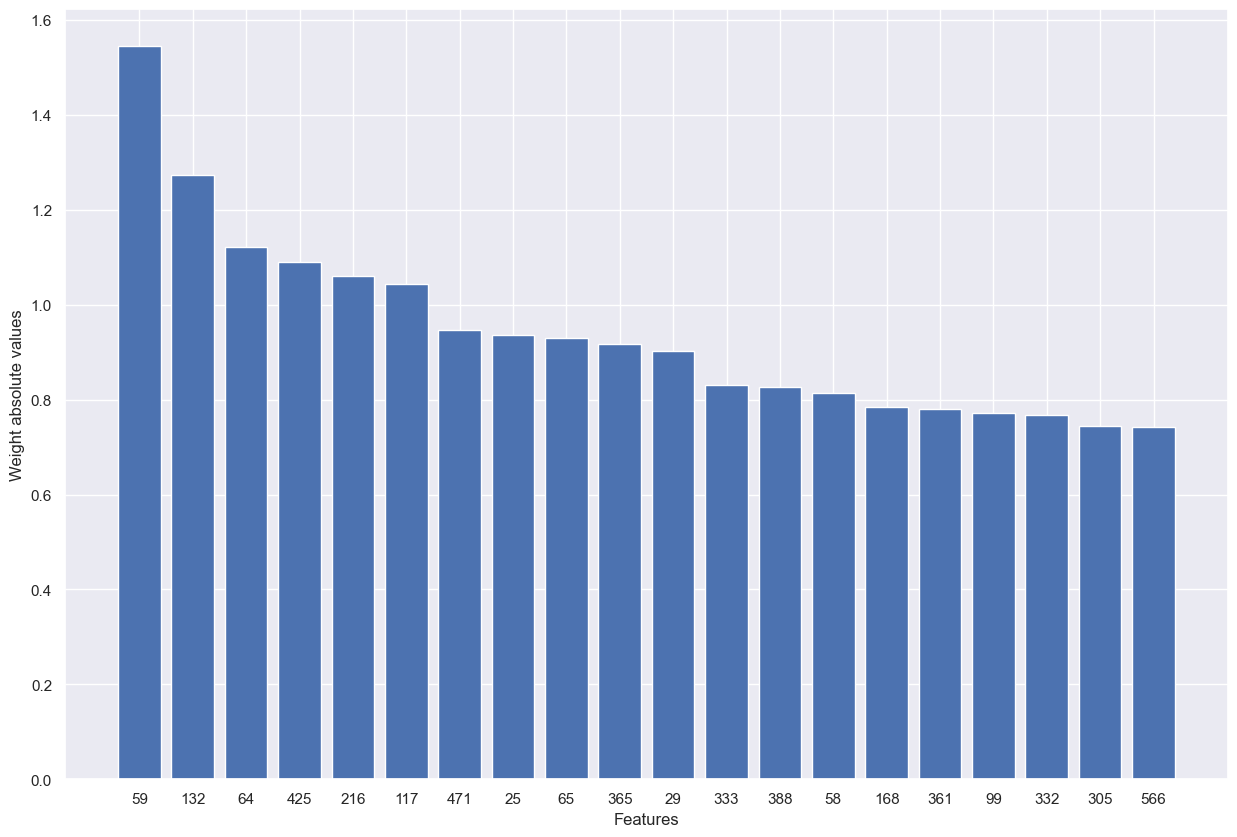

In [27]:
# bar 형태 그래프로 Logistic Regression의 feature 별 중요도를 상위 20개 출력합니다.
# 상위 20개의 feature 정보를 출력하기 위하여 sorting을 수행하고 해당 feature 번호를 LR_imort_x에 저장합니다.
LR_import_x = [str(i[0]) for i in sorted(enumerate(abs_coef), key=lambda x:x[1], reverse=True)]

plt.bar(LR_import_x[:20], sorted(abs_coef, reverse=True)[:20])

plt.rcParams['figure.figsize'] = (15, 10)
plt.xlabel('Features')
plt.ylabel('Weight absolute values')
plt.show()

**퀴즈1. 위 학습된 LogisticRegression 모델에서 Weight absolute value가 30번째인 값을 구하세요.**

첫 번째 Weight absolute value의 값은 `sorted(abs_coef, reverse=True)[0]`으로 구할 수 있습니다.

In [ ]:
# sorted(abs_coef, reverse=True) 을 활용하면 쉽게 구할 수 있습니다.



In [ ]:
# 수치형 값으로 입력합니다. (배열 형태는 오답 처리됩니다.)
quiz_1 = None

### 5.2. 다양한 분류 모델 학습

In [ ]:
#xgboost 설치가 잘 안되면 Anaconda Powershell Prompt(anaconda3)에서 해봅니다.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


#여러 모델을 append해서 추가합니다. 
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('CART', DecisionTreeClassifier()))  # 의사결정트리 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    # fit으로 학습을 합니다. 
    model.fit(x_train, y_train)
    
    # %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다. 
    # 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
    # score 함수를 사용하여 모델의 성능을 확인합니다.
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

In [ ]:
# xgb 모델에서 변수 중요도를 출력합니다.
# xgboost 모듈의 plot_importance는 피처 중요도를 시각화할 때 사용합니다. 
# models[-1][1]는 models 리스트에서 맨 마지막 요소(이것도 리스트)에서 두번째 요소를 말합니다. 
# importance_type는 중요도가 어떻게 계산되는지 정합니다. 
# weight는 나온 횟수를 말합니다. gain은 평균적인 이득을 말합니다. cover는 coverage의 평균입니다. 

xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'total_gain', show_values = False, max_num_features = 20)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Features')
plt.show()

## 6. 평가 및 예측

학습 과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였습니다.

accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

Accuracy 값이 높으면 좋은 성능을 낸다고도 할 수 있지만 이번 실습인 공정 이상 예측에서는 recall 값 또한 살펴봐야 합니다.

오차행렬(Confusion Matrix)은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다. 

+ TN : Negative(0)로 예측했고, 실제로도 True인 경우 - 실제는 Negative
+ FP : Positive(1)로 예측했지만 실제는 False인 경우 - 실제는 Negative
+ FN : Negative(0)로 예측했고, 실제는 False인 경우 - 실제는 Positive
+ TP : Positive(1)로 예측했고, 실제로도 True인 경우 - 실제는 Positive

공정 이상 예측에서 중요한 것은 이상 없음을 정확히 예측하는 것 보단 이상 있음을 정확히 예측하는 것입니다. 

recall 방식은 `예측한 이상 있음` 대비 `실제 이상 있음`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

정밀도(Precision)는 예측을 Positve로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. 정밀도는 FP가 낮아야 합니다. 
+ TP / (FP + TP)

재현율(recall)은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 말합니다. 재현율은 FN이 낮아야 합니다.
+ TP / (FN + TP)


이번 파트에서는 recall 방식을 포함한 또 다른 대표적인 평가 방법에 대해서 알아보고 주어진 데이터에 대해서 예측하는 것을 수행해보겠습니다.

### 6.1. Confusion Matrix

기존 score에서 볼 수 있었던 결과는 accuracy 기반의 결과였습니다. confusion matrix를 출력하여 각 class 별로 예측한 결과에 대해서 자세히 알아봅시다.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# LinearDiscriminantAnalysis 모델의 confusion matrix를 사용하기 위하여 학습용 데이터의 예측값을 저장합니다.
# models[0]는 LDA
model_predition_train = models[0][1].predict(x_train)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_train = confusion_matrix(y_train, model_predition_train)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)

# annot은 annotate each cell with numeric value로 셀에 숫자값을 표시하는지 정하는 것입니다. 
# cmap으로 색깔을 지정할 수 있습니다. cmap='RdYlGn_r' cmap="YlGnBu"
ax = sns.heatmap(cm_train, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
ax.set_xticklabels((-1,1))
ax.set_yticklabels((-1,1))
plt.show()
cm_train

위 confusion matrix에서 x 축은 실제 데이터의 label을 의미하고 y 축은 예측한 데이터의 label을 의미합니다.

- **0,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **0,1 의 값:** `이상 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **1,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수
- **1,1 의 값:** `이상 있음(Fail)` 이라고 에측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수

**퀴즈2. LDA 모델에서 평가용 데이터(`x_test, y_test`)의 confusion matrix를 구하세요.**

In [ ]:
# LinearDiscriminantAnalysis의 x_test에 대한 예측값을 구하고 confusion_matrix() 를 사용하면 confusion matrix를 구할 수 있습니다.



In [ ]:
# confusion_matrix() 결과값을 저장합니다. 
quiz_2 = None

### 6.2. Precision & Recall

분류 모델의 또 다른 성능 지표로 Precsion과 Recall를 구하여 봅시다.

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력합니다.
print("Recall score: {}".format(recall_score(y_test, models[0][1].predict(x_test))))
print("Precision score: {}".format(precision_score(y_test, models[0][1].predict(x_test))))

### 6.3. 테스트 데이터의 예측값 출력

테스트 데이터를 하나씩 입력하여 그 결과를 출력해 봅시다.

In [ ]:
# 0번부터 9번까지 10개를 출력해보겠습니다.
for i in range(10): 
    
    # LDA 모델을 사용하였습니다.
    # reshape()에서 -1이 들어간 곳은 가변적으로 바꿉니다. 예를 들어 12개의 원소가 있고 reshape(-1,2)를 하면 열 2개를 맞추기 위해서 행을 6개로 바꿉니다. 
    prediction = models[0][1].predict(x_test[i].reshape(1,-1))
    
    #문자열 포맷팅의 방법입니다. {}가 괄호()안의 값에 각각 대응됩니다. 
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

---

## 제출하기

퀴즈 1번, 2번까지 수행 후, 아래 코드를 실행하면 `quize_1, quize_2` 변수가 저장된 `student_answers.json` 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [ ]:
import json

student_answers = {'quiz_1': float(quiz_1), 'quiz_2': quiz_2.tolist()}

with open("result.json", "w") as f:
    json.dump(student_answers, f)

---

## 챌린지

이번 프로젝트에서 사용한 모델은 학습용 데이터에 대한 **accuracy**는 좋은 성능을 보여주었지만, 평가용 데이터에서 **accuracy, recall** 지표는 좋은 성능을 보여주지 못 하였습니다. 다양한 방식을 사용하여 평가용 데이터에서의 **accuracy, recall**을 높일 수 있는 방법을 찾아봅시다.

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>